In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Batch size is the number of training examples used to train the network at a time.

# What is better, to have a large batch size or a small one?
# It depends on the problem. Large batch sizes can speed up the training process, but they make the training process less stable.
# Small batch sizes provide a more stable training process, but they slow down the training process.

# The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

batch_size = 32
image_size = (256, 256)

# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'dataset/Lung Segmentation Data/Lung Segmentation Data/Train',
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'dataset/Lung Segmentation Data/Lung Segmentation Data/Val',
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
    )


2023-05-15 00:56:24.632932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [26113]
	 [[{{node Placeholder/_0}}]]
2023-05-15 00:56:24.633265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [26113]
	 [[{{node Placeholder/_4}}]]


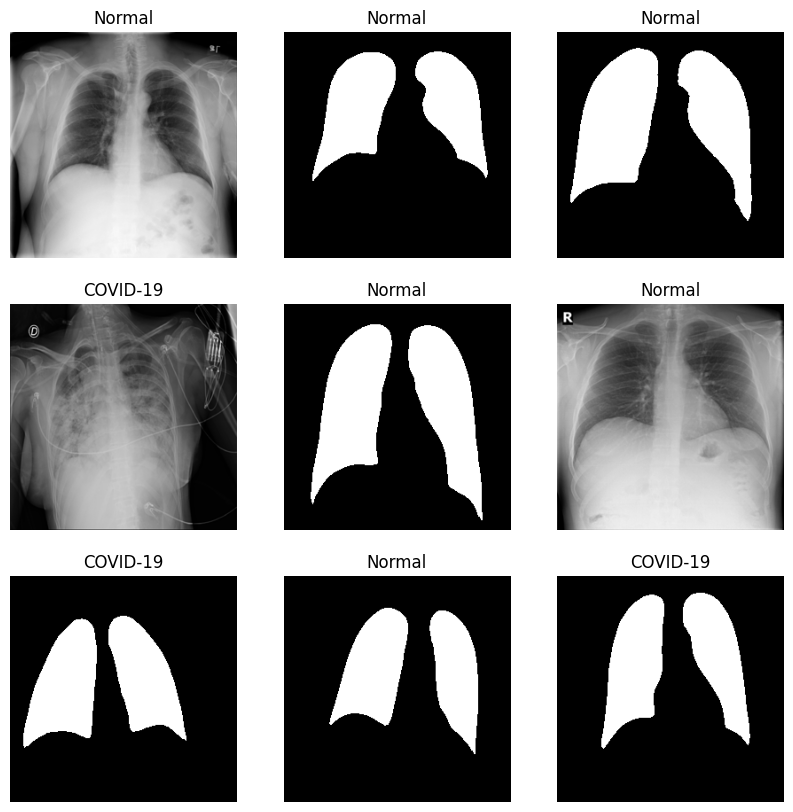

In [10]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [7]:

model = keras.Sequential([
    # Rescaling - Rescale the image to a value between 0 and 1, because the values of the pixels are between 0 and 255
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    # Augmentation - Randomly flip the image horizontally and vertically
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # Convolutional layer - Extract features from the image
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    # Pooling layer - Reduce the dimensionality of the image
    keras.layers.MaxPooling2D(),
    # Convolutional layer - Extract features from the image
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    # Pooling layer - Reduce the dimensionality of the image
    keras.layers.MaxPooling2D(),
    # Convolutional layer - Extract features from the image
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    # Pooling layer - Reduce the dimensionality of the image
    keras.layers.MaxPooling2D(),
    # Flatten layer - Flatten the image from 2D to 1D
    keras.layers.Flatten(),
    # Dense layer - Reduce the dimensionality of the image
    keras.layers.Dense(128, activation='relu'),
    # Dropout layer - Reduce overfitting
    keras.layers.Dense(1, activation='sigmoid')
    ])


model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

model.summary()

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
    )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                    

2023-05-14 23:55:56.630659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [26113]
	 [[{{node Placeholder/_4}}]]
2023-05-14 23:55:56.631456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [26113]
	 [[{{node Placeholder/_0}}]]
/home/ahmed/.local/lib/python3.10/site-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


817/817 [==============================] - ETA: 0s - loss: 0.5047 - accuracy: 0.7472

2023-05-15 00:02:37.179533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [723]
	 [[{{node Placeholder/_4}}]]
2023-05-15 00:02:37.179761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [723]
	 [[{{node Placeholder/_4}}]]


817/817 [==============================] - 403s 492ms/step - loss: 0.5047 - accuracy: 0.7472 - val_loss: 0.4045 - val_accuracy: 0.8133
Epoch 2/10
817/817 [==============================] - 379s 464ms/step - loss: 0.3723 - accuracy: 0.8292 - val_loss: 0.3911 - val_accuracy: 0.8243
Epoch 3/10
817/817 [==============================] - 379s 463ms/step - loss: 0.3236 - accuracy: 0.8528 - val_loss: 0.3328 - val_accuracy: 0.8506
Epoch 4/10
817/817 [==============================] - 356s 436ms/step - loss: 0.2820 - accuracy: 0.8756 - val_loss: 0.3478 - val_accuracy: 0.8368
Epoch 5/10
817/817 [==============================] - 353s 432ms/step - loss: 0.2346 - accuracy: 0.8994 - val_loss: 0.3888 - val_accuracy: 0.8368
Epoch 6/10
817/817 [==============================] - 352s 431ms/step - loss: 0.2002 - accuracy: 0.9148 - val_loss: 0.4170 - val_accuracy: 0.8451
Epoch 7/10
817/817 [==============================] - 355s 434ms/step - loss: 0.1600 - accuracy: 0.9355 - val_loss: 0.4578 - val_accura

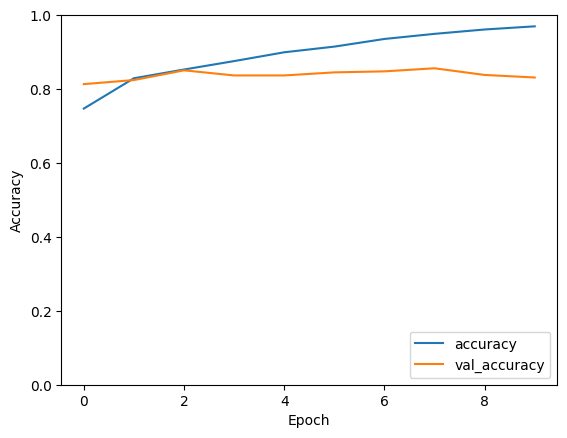

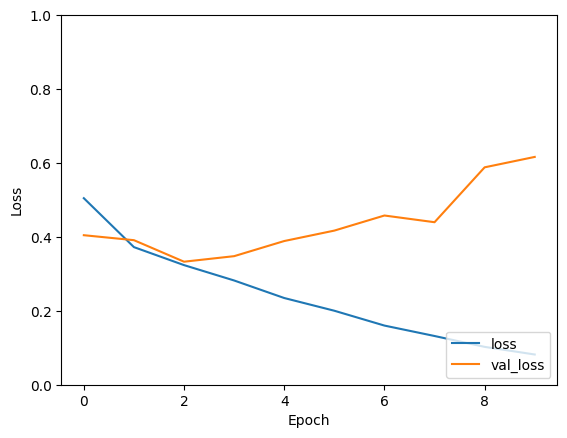

In [8]:
# Plotting the accuracy and loss of the model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [9]:
# Now we save the model:
model.save('model_covid.h5')